In [68]:
import pandas as pd

hiphop1 = pd.read_csv('youtube_hiphop1.csv')
hiphop2 = pd.read_csv('youtube_hiphop2.csv')
hiphop3 = pd.read_csv('youtube_hiphop3.csv')

hiphop = pd.concat([hiphop1, hiphop2])
hiphop = pd.concat([hiphop, hiphop3])

data= hiphop['Comment']
data

text=list(data)
text

['태풍바비온대서기념으로보러옴.',
 '체크해보겠습니다2020하반기는손을들어주세요',
 '이건ㅅㅂ쇼팽인내가들어도가슴이웅장해진다',
 '아니어떻게고등학생이무대장악력이ㅋㅋㅋ',
 '진짜레전드인건바비가저무대할때나이가19살이었다는거임ㅋㅋㅋㅋㅋ요즘고등래퍼라는프로가생겨서그렇지바비는애초에십대때쇼미1등한것부터걍쌉레전드인거ㄷㄷ',
 '바비랩앨범좀내줘제발...무대장악력ㅈ되네진짜',
 '이걸이긴랩은널렸지만이걸이긴무대는아직까지도없는거같다',
 "2020andIstillcan'tgetoverthisperformance",
 "Bobby'slevelofhypeisoutofthisworld.BeenwatchingSMTMsinceseasonone.SomehowstillgobackandlistentoBobby'ssong.Hedidn'tneeddancersorabigstage.",
 '좆나이만한무대다신못나올듯...장악력미쳣노',
 '3:23이거눌러보지도않고어디인지알것같으면좋아요박아봐',
 '다시봐도느끼는거지만초반에박자놓지는거나발음뭉개지는거호흡딸리는거등등단점들이보이는데무대장악력하고간지로그걸다안보이게하네ㅋㅋㅋ진짜그두개는탑급인듯대단하다ㅋㅋ',
 '바비쇼미한번나오면씹어먹을꺼같은데',
 '바비가ㅈㄴ대단한게본선2차무대빼고다피처링없이혼자함.요즘쇼미에선피쳐링이기본옵션인데.그런데도무대장악력,제스처,텐션이지려서무대를혼자해도지루하지가않음',
 '3:18전설의대한민국힙찔이대량생산씬ㄷㄷ',
 '누군가우리나라힙합르네상스시작이언제냐고묻는다면3:18이장면을보여주면된다',
 '지디현아바비이런애들보면ㄹㅇ무대체질따로있구나느낌얘네보다랩잘하는사람은많지만얘네처럼무대하는애들없는듯ㅋㅋ천상연옌',
 'WasneveraBobbyfanfromthebeginning.Tobehonest,inthebeginningepisodesIthoughtBobbywastoooverhypedespeciallywithhisrepeatedslip-ups.Hehasdefinitelyprogressedandearnedmyrespect.LosinginthatYGsho

In [70]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [71]:
review_cv.shape

(3820, 1000)

In [72]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [73]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (3820, 10)


In [74]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [60]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 비, 랩, 실력, 가사, 이, 레디, 좀, 이번, 대박, 보
Topic #1: 행주, 때, 시즌, 레드, 곡, 바스코, 표정, 역시, 파이널, 세미
Topic #2: 때, 너, 날, 난, 내, 안, 나, 오늘, 꿈, 더
Topic #3: 무대, 최고, 역대, 간지, 카메라, 비트, 보고, 미역, 손, 처음
Topic #4: 진짜, 스윙스, 지코, 부분, 돈까스, 개, 볼때, 음원, 분위기, 여기
Topic #5: 힙합, 쇼미더머니, 왜, 더, 쇼, 연결고리, 국힙, 요즘, 일리네어, 충
Topic #6: 쇼, 소름, 레전드, 다시, 이건, 영상, 듯, 관객, 댄서, 피처링
Topic #7: 래퍼, 존나, 바비, 우승, 아이돌, 장악, 실눈, 살, 피쳐링, 연습생
Topic #8: 바비, 사람, 거, 노래, 생각, 애, 함, 라이브, 댓글, 그냥
Topic #9: 지금, 게, 소리, 뭐, 것, 정도, 눈, 놈, 계속, 순간



In [69]:
twitter_tag.nouns(text[1])

['체크', '하반기', '손']

In [75]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [76]:
tokenizer(text[1])

['체크', '하반기']

In [77]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [78]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 보고, 느낌, 계속, 아이콘, 앨범, 부터, 반응, 평가, 오지, 프로그램
Topic #1: 진짜, 무대, 인정, 쩐다, 바비, 티비, 가면, 산이, 그룹, 순위
Topic #2: 파이널, 세미, 제일, 무대, 신분, 형님, 버전, 카메라맨, 은근, 엠비션
Topic #3: 순간, 뭔가, 최면, 조명, 혼자, 시작, 왼쪽, 예전, 촛불, 세면
Topic #4: 행주, 분위기, 기분, 개간, 이웅, 치면, 승리, 서치, 최초, 걸즈
Topic #5: 개인, 일리네어, 충격, 친구, 한국, 인기, 사실, 힙합, 대중화, 레이블
Topic #6: 댄서, 형주, 엠넷, 모습, 돈가스, 전율, 이아, 거임, 자막, 화면
Topic #7: 표정, 무대, 언제, 바비, 다음, 톡식, 최자, 보기, 진짜, 체질
Topic #8: 생각, 한번, 역사, 웃기, 시비, 주님, 플로우, 애기, 자랑, 소속사
Topic #9: 진짜, 린다, 박자, 미보, 기독교, 언급, 쌈디, 스윙, 닭살, 김지원
Topic #10: 지코, 피쳐링, 틱톡, 송민호, 새끼, 은비, 제스쳐, 거의, 킬링, 파트
Topic #11: 쇼미더머니, 짝짝, 아들, 김구라, 돌려차기, 보시, 완료, 기전, 무대, 주행
Topic #12: 부분, 목소리, 연출, 카메라감독, 사상, 어디, 서바이벌, 레알, 게다, 구라
Topic #13: 이건, 구도, 보이, 이름, 진짜, 웅장, 급식, 김동현, 거북선, 소울
Topic #14: 래퍼, 고등, 프로, 무도, 진짜, 듀싱, 온몸, 앵글, 무빙, 존잘
Topic #15: 카메라, 요즘, 관중, 밴드, 살이, 중독, 설마, 에이, 가가, 만하
Topic #16: 우승, 태풍, 출첵, 후보, 하나로, 참가자, 켄드릭, 코로나, 자꾸, 벌써
Topic #17: 힙합, 딜리, 랩퍼, 가쇼, 본인, 본방, 단점, 무조건, 라면, 바비
Topic #18: 레드, 간지, 연결고리, 역시, 사기, 디제이, 끼리, 피오, 세션, 펀치
Topic #19: 진짜, 머리

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 4 0 0 0 0]


In [80]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([ -8.902948  , -12.627567  ,  -9.957947  , -21.252468  ,
         8.452     , -16.6485    , -10.666832  , -17.495552  ,
       -23.757673  , -16.426805  , -29.063086  , -20.806055  ,
       -18.757326  ,  -6.630728  , -13.867763  ,  -3.422618  ,
       -27.094769  ,  -2.502409  ,   4.3054    , -13.168811  ,
        -1.718859  ,  -7.5625653 ,  -7.444354  , -15.307483  ,
       -11.756201  , -32.238174  , -15.89481   , -11.751227  ,
         1.7295405 , -25.79033   ,  -9.650988  ,  -1.0382867 ,
       -14.538277  ,  -8.258518  , -22.211927  , -17.08097   ,
       -20.520258  , -13.585146  ,   2.3205385 ,  -0.64302576,
        -3.5817719 ,  -8.084997  ,   6.745182  ,  -4.836696  ,
       -21.495346  ,   6.836106  , -16.282997  ,  -3.8224254 ,
        -9.8456    ,  -8.501005  ], dtype=float32)

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

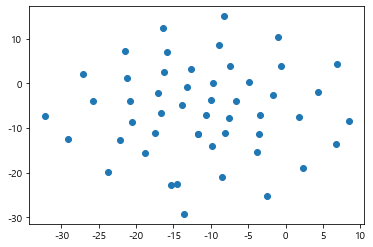

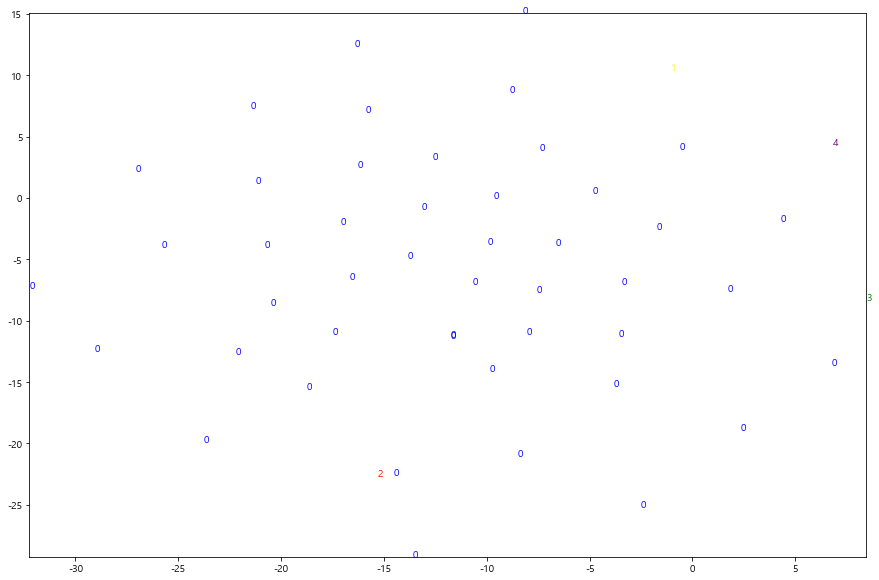

In [82]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

In [83]:
lda.perplexity(review_cv)

927.6933859213433

In [84]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 보고, 느낌, 계속, 아이콘, 앨범, 부터, 반응, 평가, 솔로, 바비
Topic #1: 진짜, 가사, 그냥, 무대, 바비, 그레이, 칙촉, 쩐다, 인정, 발차기
Topic #2: 바스코, 소름, 연결고리, 무대, 파이널, 바비, 세미, 제일, 프로듀서, 아이언
Topic #3: 정도, 순간, 뭔가, 최면, 소리, 조명, 혼자, 시작, 왼쪽, 예전
Topic #4: 무대, 관객, 라이브, 영상, 하나, 피아노, 행주, 가슴, 원래, 괴물
Topic #5: 힙합, 아이돌, 개인, 일리네어, 바비, 래퍼, 연결고리, 충격, 한국, 친구
Topic #6: 간지, 돈까스, 연습생, 딜리, 이유, 밴드, 금보, 지리, 비니, 살이
Topic #7: 지코, 표정, 무대, 바비, 진짜, 도끼, 회수, 언제, 전설, 다음
Topic #8: 지금, 생각, 국힙, 한번, 박재범, 행주, 머리, 역사, 웃기, 무대
Topic #9: 존나, 볼때, 진짜, 미역, 마지막, 린다, 갑자기, 자체, 박자, 인맥
Topic #10: 실력, 무대, 장악, 누가, 틱톡, 송민호, 제스쳐, 새끼, 문제, 은비
Topic #11: 행주, 진짜, 소름, 피처링, 짝짝, 대박, 바비, 아들, 바로, 마일
Topic #12: 부분, 무대, 다시, 진짜, 연출, 목소리, 바비, 카메라감독, 사상, 중독
Topic #13: 역대, 카메라, 이건, 소리, 요즘, 이곡, 진짜, 데이데이, 구도, 이름
Topic #14: 래퍼, 바비, 존나, 진짜, 고등, 프로, 원재, 제스처, 해도, 행주
Topic #15: 쇼미더머니, 처음, 자기, 사람, 제발, 가장, 공연, 힙합, 나이, 면서
Topic #16: 우승, 때문, 태풍, 이번, 출첵, 다시, 진짜, 영화, 기분, 무도
Topic #17: 스윙스, 사람, 댓글, 정말, 가쇼, 본인, 생각, 개코, 기네, 인간
Topic #18: 레드, 역시, 행주, 스윙스, 얼마나, 항상, 사기, 무대, 진짜, 소름
Topic #19: 오늘, 얼굴, 가나

712.5898997949888

In [85]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 노래, 보고, 여기, 비트, 느낌, 레디, 실력, 때문, 댓글, 아이콘
Topic #1: 스윙스, 레전드, 시즌, 최고, 그냥, 피처링, 국힙, 더블, 도끼, 통틀어
Topic #2: 소름, 바스코, 다시, 표정, 이건, 처음, 미역, 실눈, 연결고리, 파이널
Topic #3: 사람, 지금, 가사, 소리, 정도, 계속, 순간, 뭔가, 최면, 조명
Topic #4: 무대, 우승, 레드, 역대, 장악, 분위기, 피쳐링, 요즘, 하나, 퍼포먼스
Topic #5: 힙합, 래퍼, 아이돌, 쇼미더머니, 생각, 연결고리, 일리네어, 사람, 자기, 연습생
Topic #6: 행주, 돈까스, 간지, 영상, 스윙스, 라이브, 음원, 댄서, 회수, 누가
Topic #7: 바비, 지코, 부분, 역시, 결승, 태풍, 장면, 개인, 고등, 목소리
Topic #8: 생각, 오늘, 한번, 지금, 얼굴, 박재범, 가나, 아보, 자고, 차례
Topic #9: 진짜, 존나, 카메라, 관객, 볼때, 마지막, 호응, 언제, 랩퍼, 린다



492.20194231503297

In [87]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 8, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 노래, 보고, 실력, 영상, 여기, 비트, 느낌, 레디, 댓글, 때문
Topic #1: 지금, 생각, 오늘, 한번, 얼굴, 박재범, 가나, 머리, 아보, 인정
Topic #2: 소름, 레전드, 존나, 바스코, 다시, 표정, 이건, 처음, 관객, 볼때
Topic #3: 사람, 가사, 소리, 정도, 계속, 순간, 뭔가, 최면, 조명, 왼쪽
Topic #4: 무대, 행주, 우승, 레드, 역대, 장악, 분위기, 지코, 피쳐링, 요즘
Topic #5: 힙합, 래퍼, 아이돌, 시즌, 쇼미더머니, 연결고리, 바비, 생각, 개인, 일리네어
Topic #6: 진짜, 돈까스, 최고, 간지, 카메라, 미역, 음원, 댄서, 회수, 도끼
Topic #7: 바비, 스윙스, 부분, 지코, 역시, 결승, 더블, 태풍, 장면, 고등



479.22009503102